<a href="https://colab.research.google.com/github/P-Sailaja/Telecom_Customer_Churn_Prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

In [ ]:
# Load the Dataset
try:
    df = pd.read_csv("/Telco-Customer-Churn.csv")
    print("Dataset loaded successfully! ✅")
except FileNotFoundError:
    print("Error: File not found. Please check the file path. ❌")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Dataset loaded successfully! ✅


In [ ]:
# Display first 5 rows of the dataset to understand its structure
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Display dataset shape (rows, columns)
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 7043 rows and 21 columns.


In [ ]:
# Display column data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display only columns that have missing values
missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print("✅ No missing values found in the dataset.")
else:
    print("❗ Missing Values Detected:")
    print(missing_values)

✅ No missing values found in the dataset.


In [ ]:
# Remove the 'customerID' column since it is not useful for prediction
df.drop(columns= ['customerID'],inplace=True)
print("Dropped 'customerID' column as it is not relevant for modeling ✅")

Dropped 'customerID' column as it is not relevant for modeling ✅


In [ ]:
# Display first 5 rows again to confirm the 'customerID' column was removed.
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Display all column names in the dataset
print("Dataset Columns:\n", df.columns.tolist())

Dataset Columns:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [ ]:
# Count the occurrences of each unique value in the 'gender' column
gender_counts = df['gender'].value_counts()

# Display the counts in a readable format
print("Gender Distribution in Dataset:\n", gender_counts)

Gender Distribution in Dataset:
 gender
Male      3555
Female    3488
Name: count, dtype: int64


<ipython-input-14-124dcdb6c546>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='coolwarm')


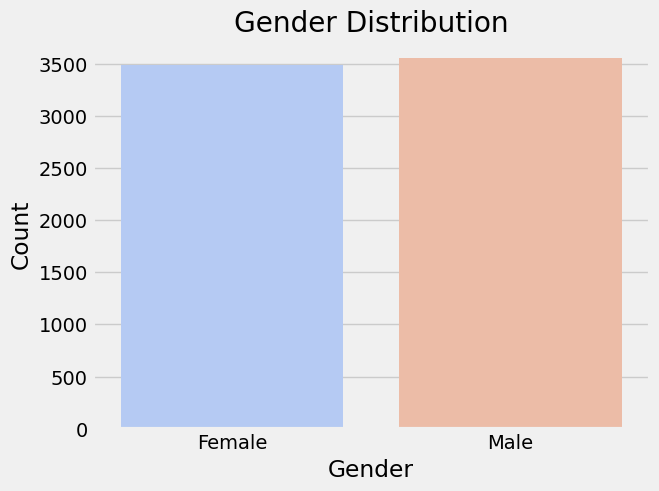

In [ ]:
# Plot the gender distribution
sns.countplot(x='gender', data=df, palette='coolwarm')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [ ]:
# Display the unique values in the 'SeniorCitizen' column
unique_senior_citizen = df['SeniorCitizen'].unique()
print("Unique values in 'SeniorCitizen' column:", unique_senior_citizen)

Unique values in 'SeniorCitizen' column: [0 1]


In [ ]:
# Check data type
print(f"'SeniorCitizen' Data Type: {df['SeniorCitizen'].dtype}")

'SeniorCitizen' Data Type: int64


In [ ]:
# Display unique values for all categorical columns (excluding numerical ones)
print("Unique values in categorical columns:\n")

for col in df.columns:
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges']:  # Exclude numerical columns
        unique_values = df[col].unique()
        print(f"{col}: {unique_values}")
        print("-" * 70)  # Improved separator for better readability


Unique values in categorical columns:

gender: ['Female' 'Male']
----------------------------------------------------------------------
SeniorCitizen: [0 1]
----------------------------------------------------------------------
Partner: ['Yes' 'No']
----------------------------------------------------------------------
Dependents: ['No' 'Yes']
----------------------------------------------------------------------
PhoneService: ['No' 'Yes']
----------------------------------------------------------------------
MultipleLines: ['No phone service' 'No' 'Yes']
----------------------------------------------------------------------
InternetService: ['DSL' 'Fiber optic' 'No']
----------------------------------------------------------------------
OnlineSecurity: ['No' 'Yes' 'No internet service']
----------------------------------------------------------------------
OnlineBackup: ['Yes' 'No' 'No internet service']
----------------------------------------------------------------------
DeviceProt

In [ ]:
# Check for blank spaces in numerical columns
print("Checking for blank spaces in numerical columns:\n")

for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    blank_spaces = df[col].astype(str).str.strip().eq("").sum()  # Count blank spaces
    print(f"{col}: {blank_spaces} blank space(s) found")
    print("-" * 60)  # Improved separator for better readability

Checking for blank spaces in numerical columns:

tenure: 0 blank space(s) found
------------------------------------------------------------
MonthlyCharges: 0 blank space(s) found
------------------------------------------------------------
TotalCharges: 11 blank space(s) found
------------------------------------------------------------


In [ ]:
# Replace blank spaces with NaN to ensure proper conversion
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

In [ ]:
# Convert to numeric type, coercing errors (non-numeric values become NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
# Fill NaN values with 0 (or use df['TotalCharges'].median() if preferred)
df.fillna({'TotalCharges' : 0.0}, inplace=True)

In [ ]:
# Confirm the data type
print(f"Updated 'TotalCharges' Data Type: {df['TotalCharges'].dtype}")

Updated 'TotalCharges' Data Type: float64


In [ ]:
print(df['TotalCharges'].isnull().sum(), "NaN values found after conversion.")

0 NaN values found after conversion.


In [ ]:
# Count the occurrences of each unique value in 'Churn' column
churn_counts = df['Churn'].value_counts()

# Display the count with labels
print("Churn Distribution:")
print(churn_counts)

Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


<ipython-input-25-aa16d73deee5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=["#FF6F61", "#6B5B95"])


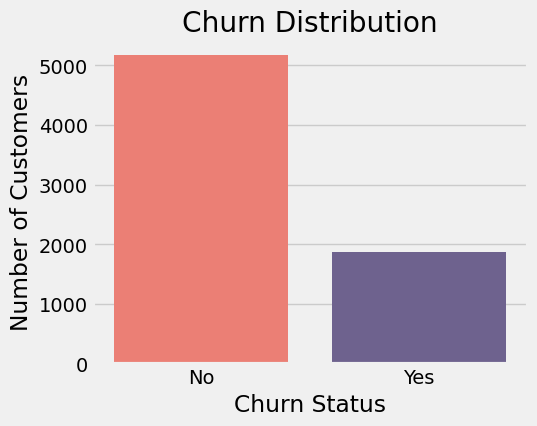

In [ ]:
#Visualizing the distribution
plt.figure(figsize=(5, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=["#FF6F61", "#6B5B95"])
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")
plt.title("Churn Distribution")
plt.show()

In [ ]:
# Check for class imbalance
churn_ratio = churn_counts / churn_counts.sum()
print("Churn Ratio:\n", churn_ratio)

Churn Ratio:
 Churn
No     0.73463
Yes    0.26537
Name: count, dtype: float64


In [ ]:
# Get summary statistics of numerical columns
df_summary = df.describe()

# Display the summary for better readability
print("Summary Statistics of Numerical Features:\n", df_summary)

Summary Statistics of Numerical Features:
        SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


In [ ]:
# Visualizing Feature Distributions
def plot_distribution(df, column_name):
    """
    Plots the distribution of a numerical column using histogram and boxplot.

    Args:
    df (DataFrame): The dataset.
    column_name (str): Name of the numerical column to visualize.

    Returns:
    None
    """
    plt.figure(figsize=(12, 4))

    # Histogram with KDE (Kernel Density Estimation)
    plt.subplot(1, 2, 1)
    sns.histplot(df[column_name], kde=True, color="teal")
    plt.title(f"Distribution of {column_name}")

    # Calculate Mean & Median
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

    # Plot Mean and Median lines
    plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
    plt.axvline(col_median, color="blue", linestyle="--", label="Median")
    plt.legend()

    # Box Plot to check for outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column_name], color="orange")
    plt.title(f"Boxplot of {column_name}")

    # Show the plots
    plt.show()

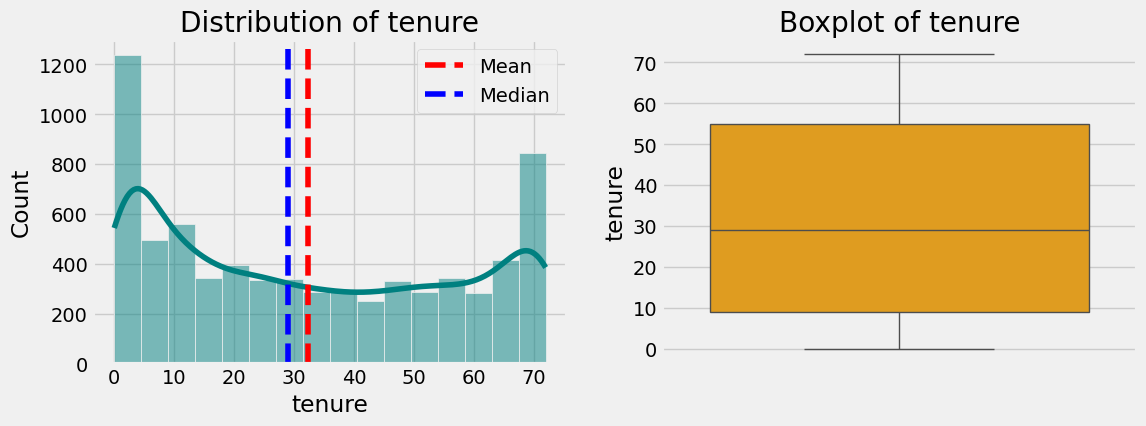

In [ ]:
# Plot distribution of 'tenure' to understand customer retention duration
plot_distribution(df,"tenure")

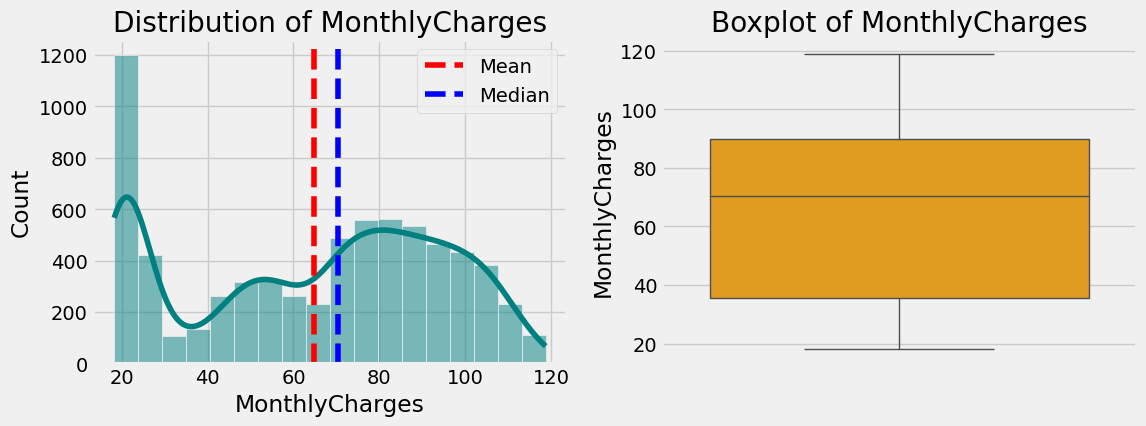

In [ ]:
# Plot distribution of 'MonthlyCharges' to analyze how much customers are paying per month
plot_distribution(df, 'MonthlyCharges')

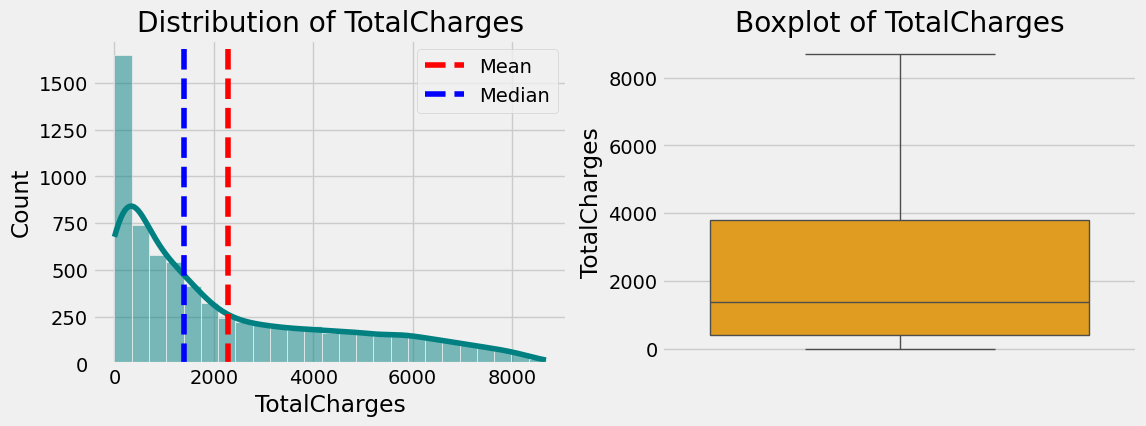

In [ ]:
# Plot distribution of 'TotalCharges' to observe the total amount customers have been billed
plot_distribution(df,"TotalCharges")

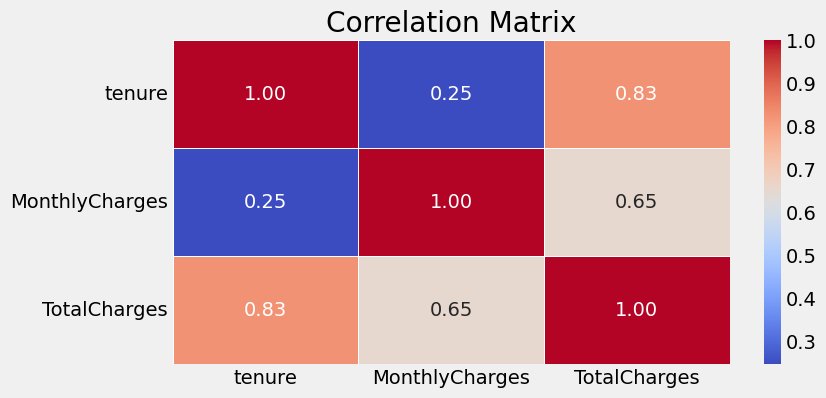

In [ ]:
# Set figure size for better visibility
plt.figure(figsize=(8, 4))

# Generate a heatmap to show correlation between tenure, MonthlyCharges, and TotalCharges
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(),
            annot=True,       # Show correlation values
            cmap="coolwarm",  # Use a coolwarm color scheme
            fmt=".2f",        # Format values to 2 decimal places
            linewidths=0.5)   # Add line borders for clarity

# Add a title to the heatmap
plt.title("Correlation Matrix")

# Display the plot
plt.show()

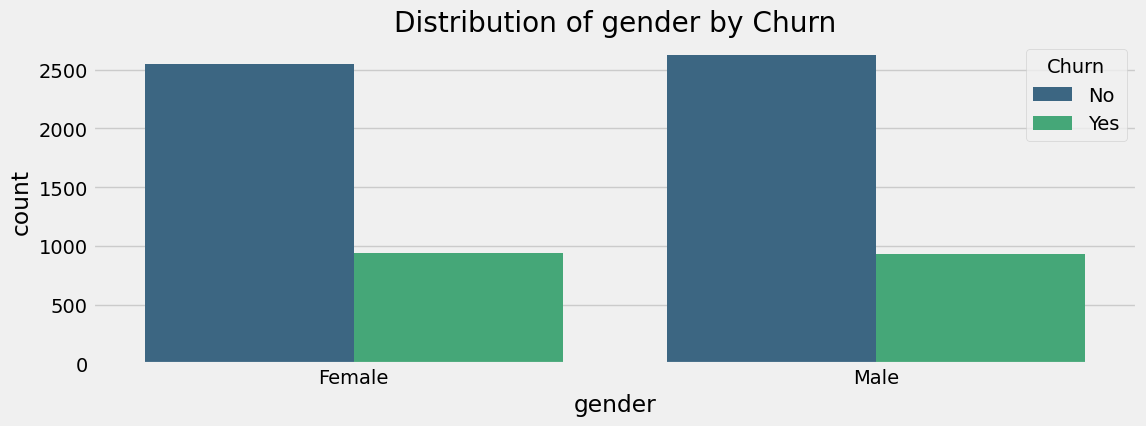

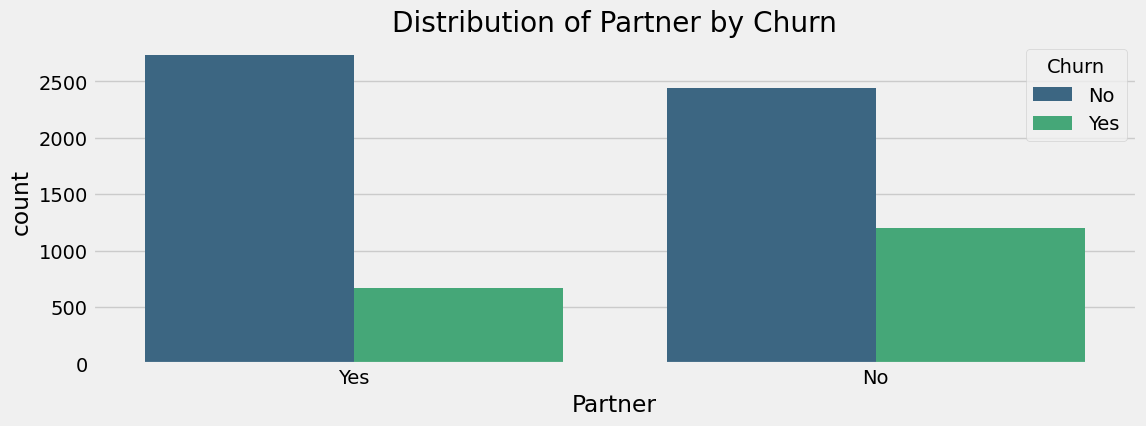

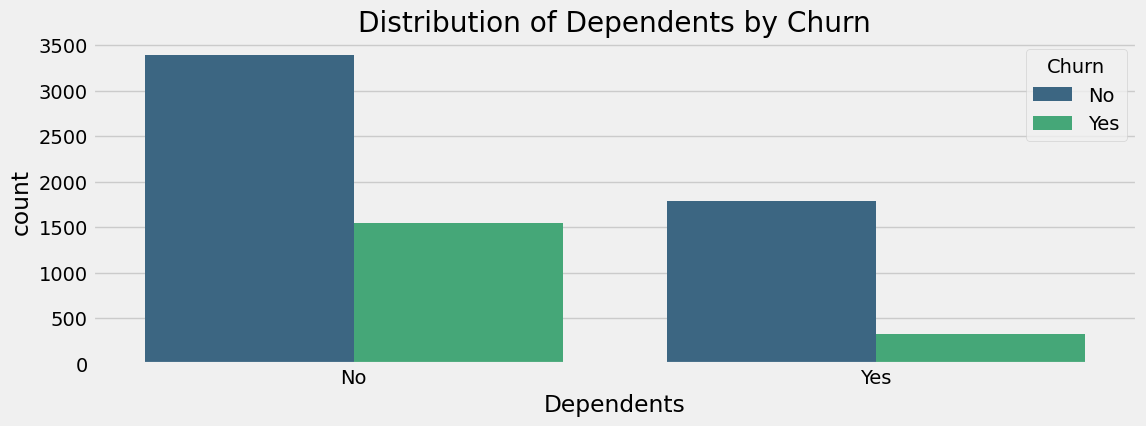

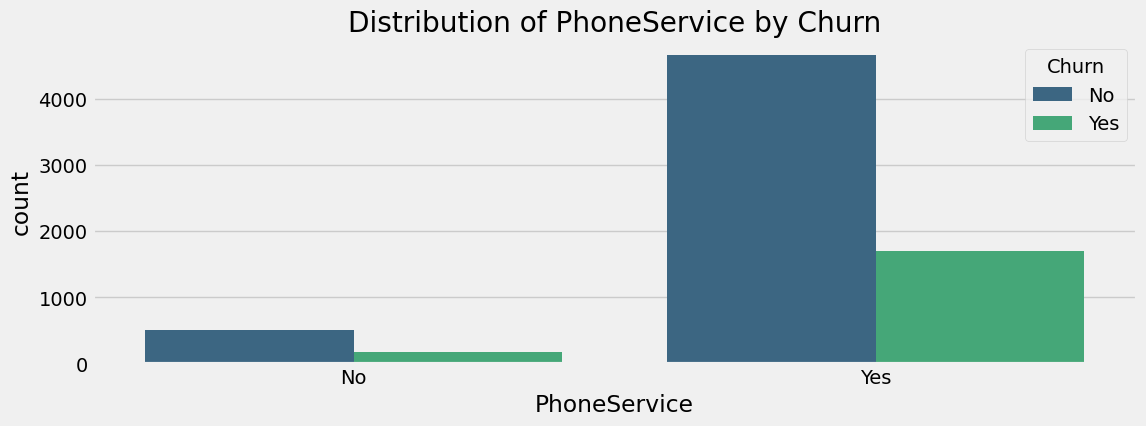

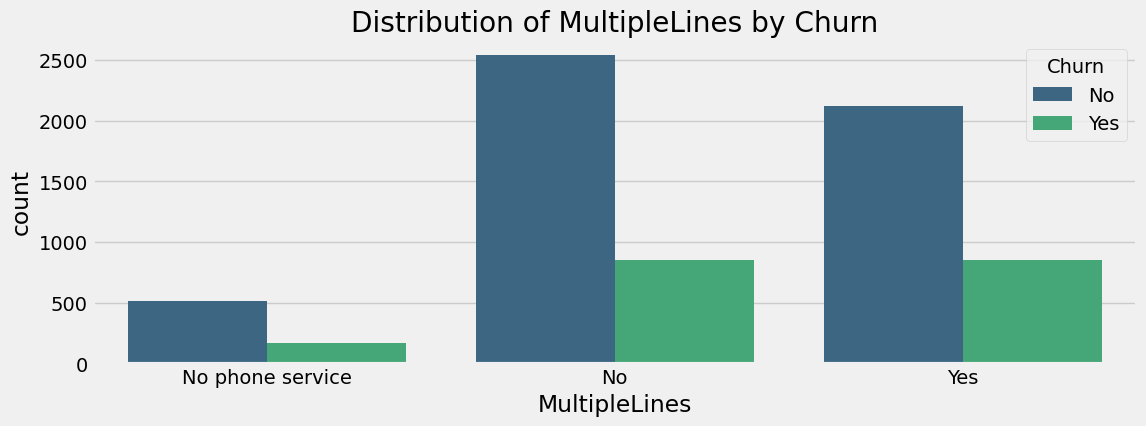

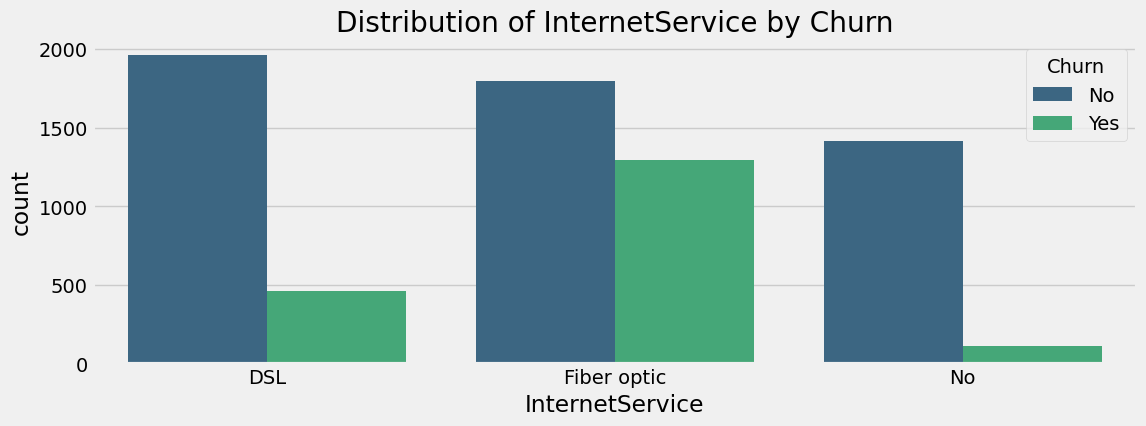

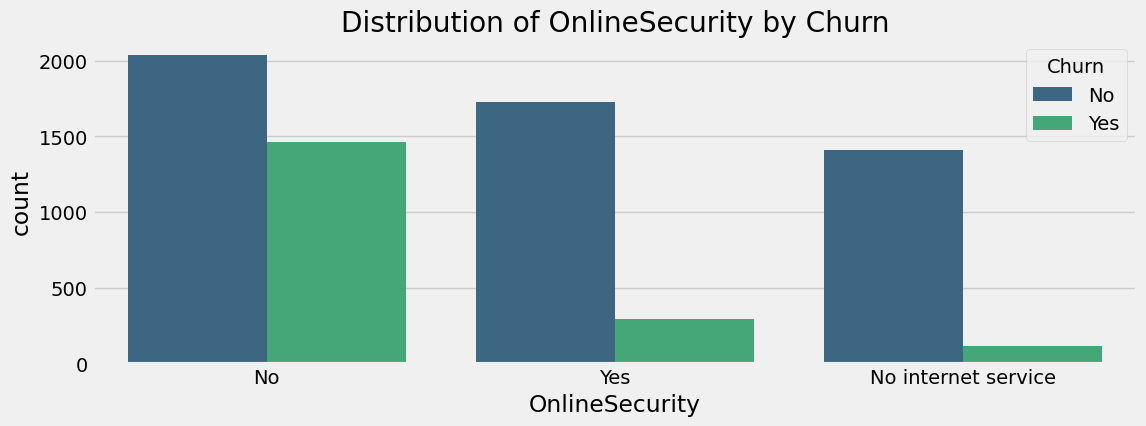

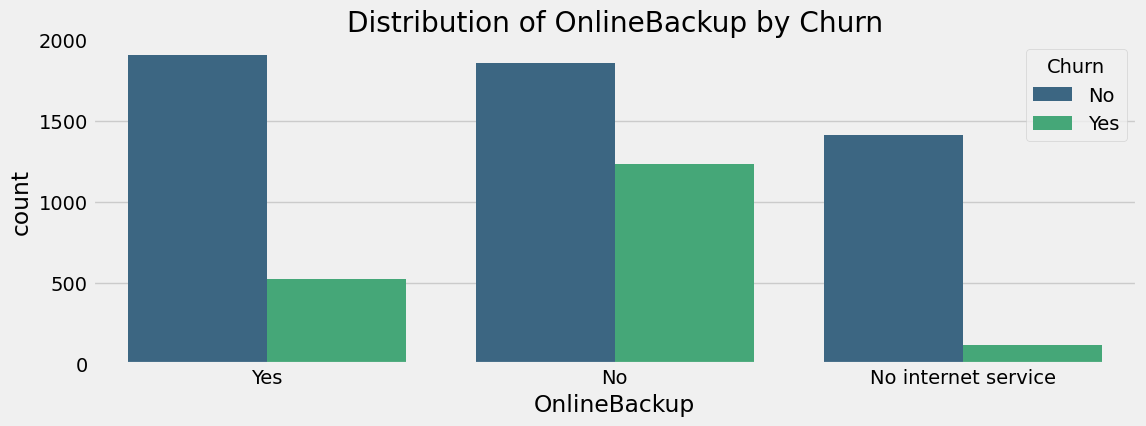

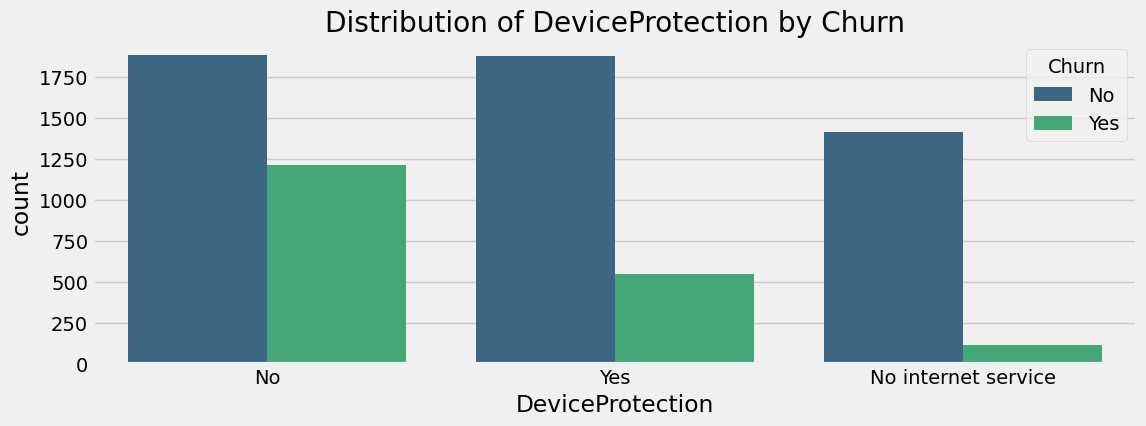

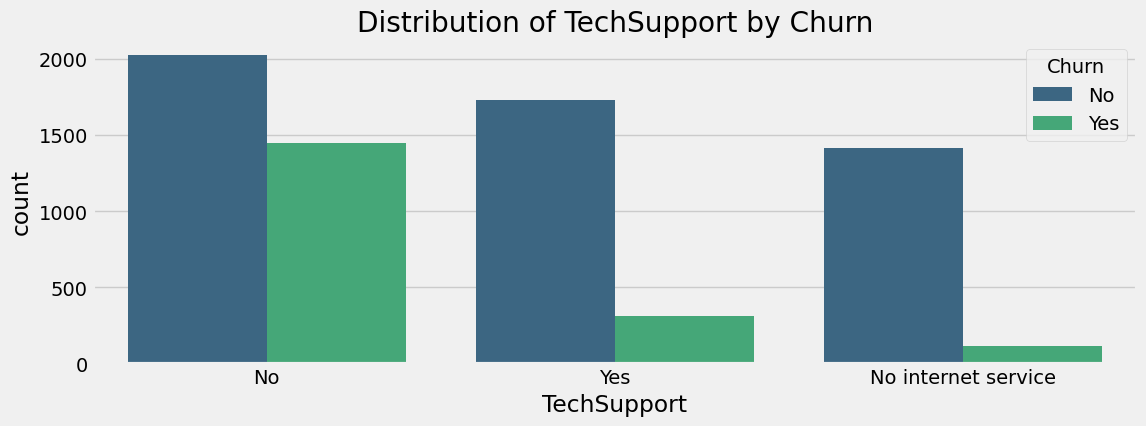

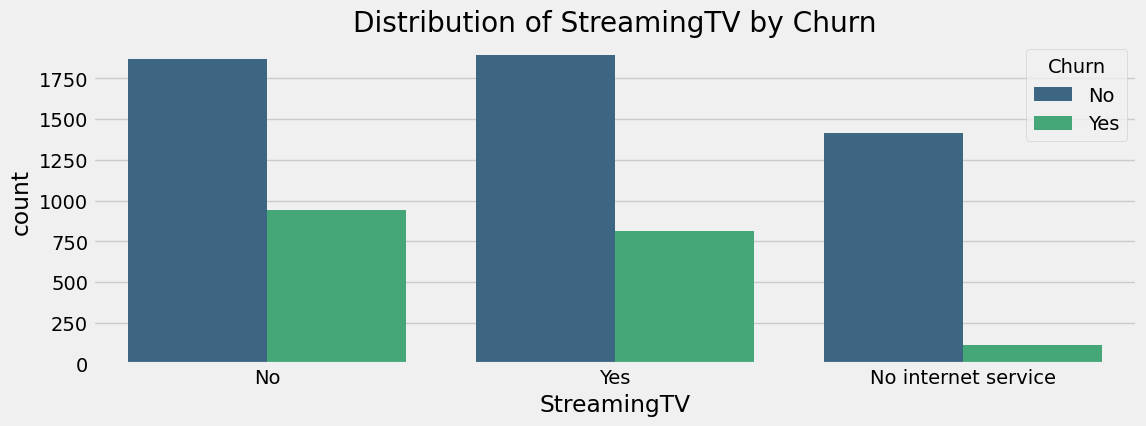

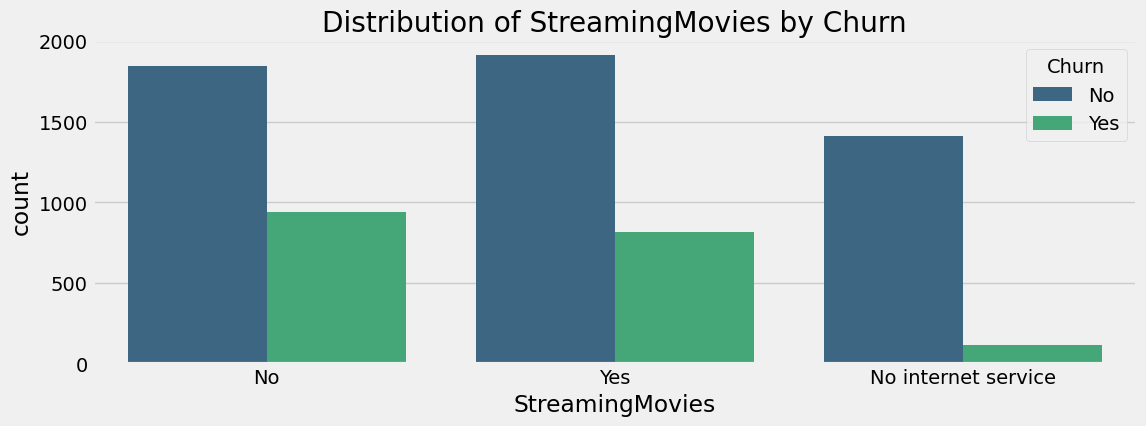

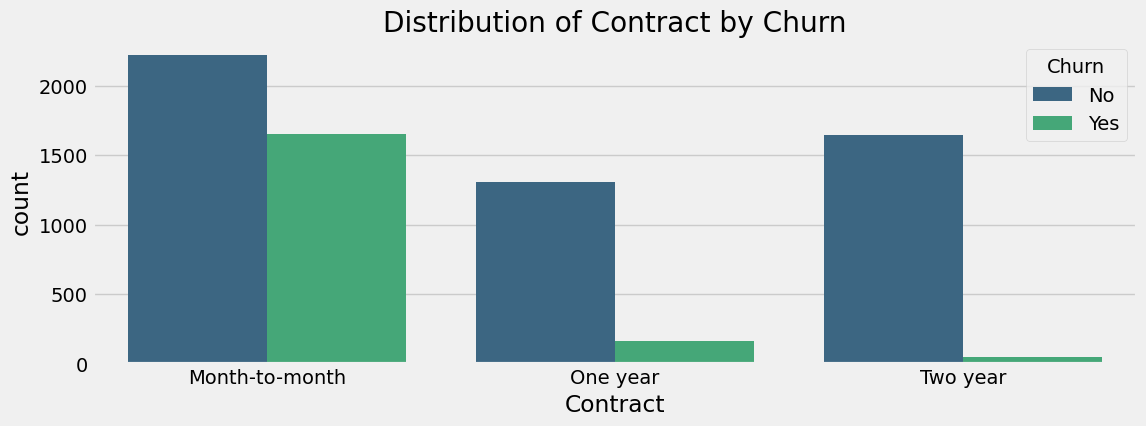

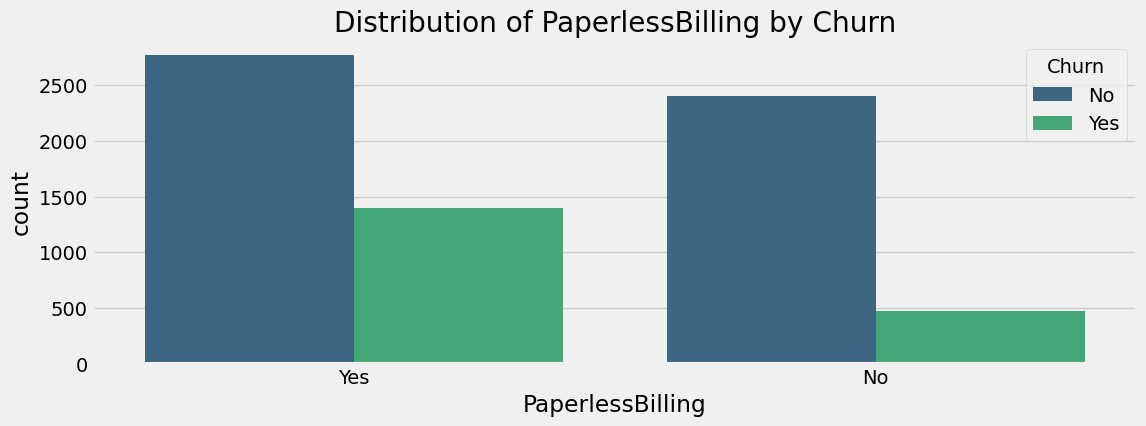

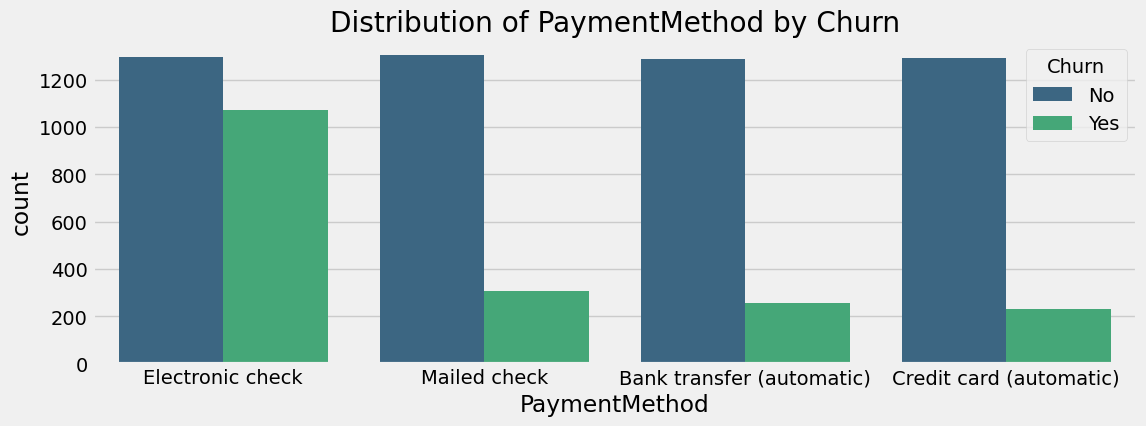

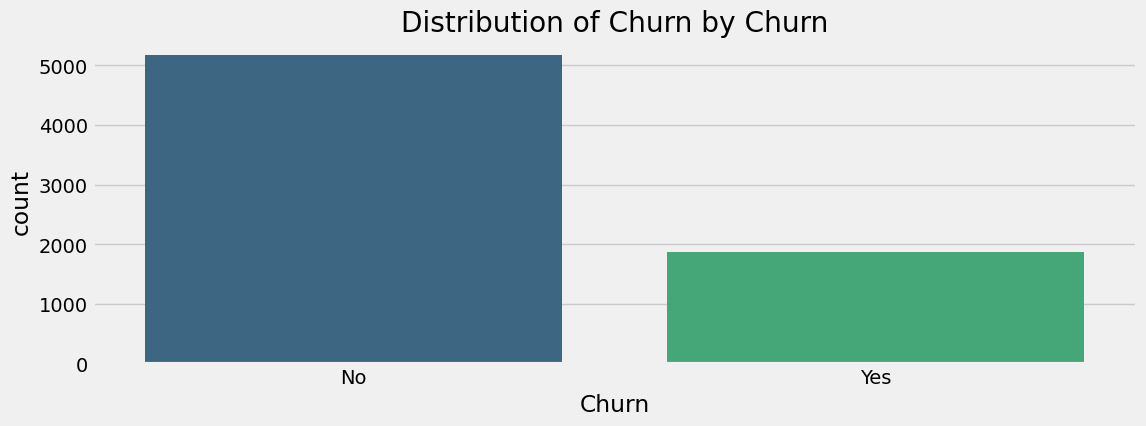

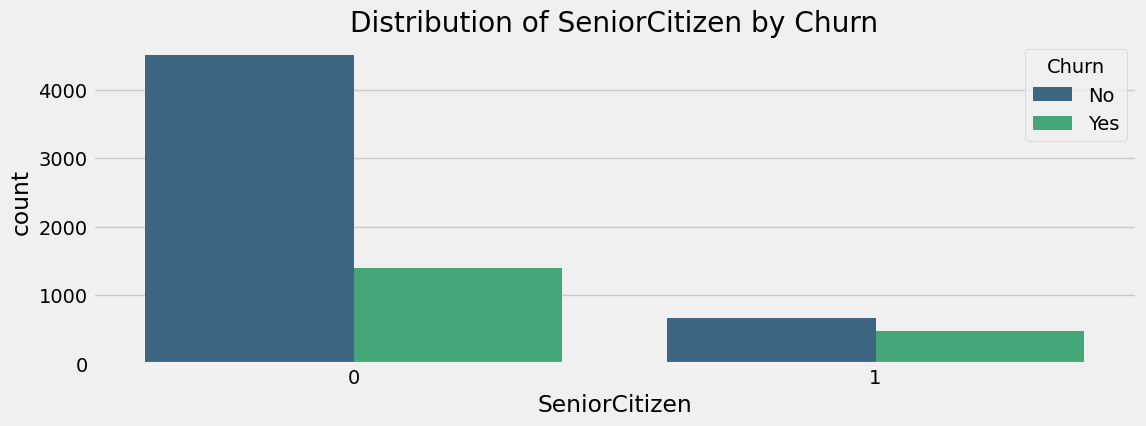

In [ ]:
# Identify all categorical columns, including 'SeniorCitizen' (as it's encoded as 0/1)
categorical_cols = df.select_dtypes(include="object").columns.to_list() + ['SeniorCitizen']

# Loop through each categorical column to visualize its impact on churn
for col in categorical_cols:
    plt.figure(figsize=(12, 4))  # Set figure size for better visibility

    # Create a countplot to show category distribution with churn comparison
    sns.countplot(data=df, x=col, hue='Churn', palette="viridis")

    # Add title for clarity
    plt.title(f"Distribution of {col} by Churn")

    # Show the plot
    plt.show()

In [ ]:
# Convert the 'Churn' column from categorical to numerical values:
# 'Yes' → 1 (Customer churned)
# 'No'  → 0 (Customer did not churn)
df['Churn'] = df['Churn'].map({"Yes" :1, "No":0})

In [ ]:
# Verify the datatype change after encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# Select columns with object (categorical) data type to identify categorical features
object_columns = df.select_dtypes(include="object").columns
object_columns  # Display the categorical columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoders = {}  # Dictionary to store label encoders for each categorical column

# Apply label encoding to each categorical column
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder  # Store encoder for potential inverse transformation

In [ ]:
# display all encoders
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [ ]:
import pickle # Importing the pickle module for serialization

# Saving the trained LabelEncoders to a file for future use
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoders,f)

In [ ]:
# Importing StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
# Selecting numerical columns for standardization
numerical_cols = ['tenure','MonthlyCharges','TotalCharges']

# Initializing StandardScaler to normalize numerical features
scaler = StandardScaler()

#Applying StandardScaler to transform the numerical columns
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

In [ ]:
# Check if any features are irrelevant or highly correlated.
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103006,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317504,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062078,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826178,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113214,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452577,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175755,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253224,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.374410,-0.195525


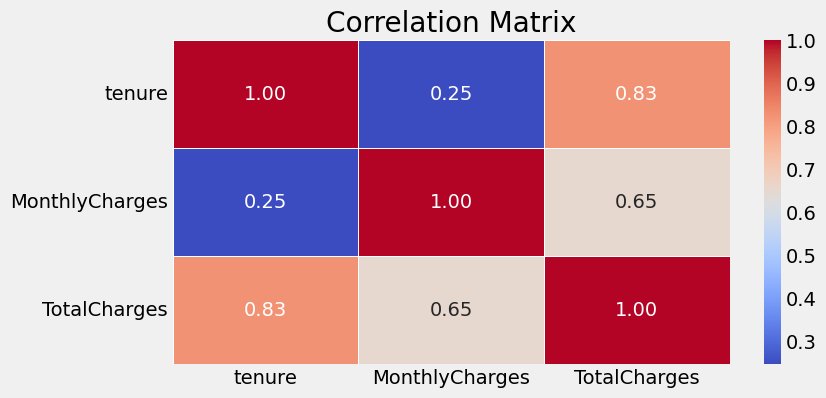

In [ ]:
# Set figure size for better visibility
plt.figure(figsize=(8, 4))

# Generate a heatmap to show correlation between tenure, MonthlyCharges, and TotalCharges
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(),
            annot=True,       # Show correlation values
            cmap="coolwarm",  # Use a coolwarm color scheme
            fmt=".2f",        # Format values to 2 decimal places
            linewidths=0.5)   # Add line borders for clarity

# Add a title to the heatmap
plt.title("Correlation Matrix")

# Display the plot
plt.show()

In [ ]:
# Importing necessary libraries for model training and evaluation

## Handling Imbalanced Data
from imblearn.over_sampling import SMOTE  # Synthetic Minority Over-sampling Technique (SMOTE) for handling class imbalance

## Splitting and Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# train_test_split - Splits data into training and testing sets
# cross_val_score - Performs cross-validation
# GridSearchCV - Hyperparameter tuning using grid search

## Machine Learning Models
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier for ensemble learning
from xgboost import XGBClassifier  # XGBoost classifier, known for high performance in tabular data

## Model Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
# accuracy_score - Calculates model accuracy
# confusion_matrix - Provides a matrix representation of model predictions
# classification_report - Summarizes precision, recall, F1-score
# roc_auc_score - Computes AUC-ROC score for classification performance


In [ ]:
# Splitting Features and Target Variable

X = df.drop(columns=['Churn'])  # Selecting all features except the target variable
y = df['Churn']  # Defining the target variable (Churn)


In [ ]:
# Splitting Data into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)  # 80% training data, 20% testing data with a fixed random state for reproducibility


In [ ]:
# Checking the distribution of target variable in the training set
y_train.value_counts()

,count
Churn,
0,4138
1,1496


In [ ]:
# Initializing SMOTE to handle class imbalance by generating synthetic samples
smote=SMOTE(random_state = 42)

In [ ]:
# Applying SMOTE to balance the dataset by oversampling the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Checking the class distribution after applying SMOTE
y_train_smote.value_counts()

,count
Churn,
0,4138
1,4138


In [ ]:
# Defining a dictionary of classification models for training and evaluation
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [ ]:
# Defining hyperparameter grids for model tuning
'''hyperparameters = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],  # Number of trees in the forest
        "max_depth": [5, 10, None],  # Maximum depth of the trees
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.1, 0.2],  # Learning rate for boosting
        "max_depth": [3, 5, 7],  # Maximum depth of trees

    }
}'''
hyperparameters = {
    "Random Forest": {
        "n_estimators": [50, 100, 200, 300],
        "max_depth": [5, 10, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.05, 0.1, 0.2],
        "max_depth": [3, 5, 7, 9],
        "n_estimators": [50, 100, 200],
        "subsample": [0.7, 0.8, 0.9]
    }
}

In [ ]:
# Dictionary to store the best-tuned models
best_models = {}

# Loop through each model and perform hyperparameter tuning
for model_name, model in models.items():
    print(f"Tuning {model_name}...")

    # Perform GridSearchCV for hyperparameter tuning
    grid = GridSearchCV(
        estimator=model,
        param_grid=hyperparameters[model_name],
        cv=3,  # 3-fold cross-validation
        scoring="accuracy"  # Using accuracy as the evaluation metric
    )

    # Fit the model on the SMOTE-resampled training data
    grid.fit(X_train_smote, y_train_smote)

    # Store the best model with the optimal hyperparameters
    best_models[model_name] = grid.best_estimator_

    # Print the best parameters and accuracy for each model
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    print(f"Best Accuracy for {model_name}: {grid.best_score_:.2f}\n")


Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Accuracy for Random Forest: 0.83

Tuning XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 50, 'subsample': 0.9}
Best Accuracy for XGBoost: 0.82



In [54]:
# Display the best models with their optimized hyperparameters
for model_name, model in best_models.items():
    print(f"Best {model_name} Model: {model}\n")

Best Random Forest Model: RandomForestClassifier(n_estimators=300, random_state=42)

Best XGBoost Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)



In [55]:
# Save the best model dynamically
best_model_name = max(best_models, key=lambda model: best_models[model].score(X_train, y_train))  # Get best model
best_model = best_models[best_model_name]

In [56]:
# Save the best model as a pickle file
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_models['Random Forest'], f)

In [57]:
# Save the scaler as a pickle file
with open ("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [58]:
# Predict on test set WITHOUT SCALING
y_test_pred = best_model.predict(X_test)
y_test_prob = best_model.predict_proba(X_test)[:, 1]

In [59]:
# Print confirmation
print(f"✅ Best Model ({best_model_name}) saved as 'best_model.pkl'")
print("✅ Scaler saved as 'scaler.pkl'")
print("✅ Prediction completed WITHOUT scaling X_test")

✅ Best Model (Random Forest) saved as 'best_model.pkl'
✅ Scaler saved as 'scaler.pkl'
✅ Prediction completed WITHOUT scaling X_test


In [60]:
y_test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [61]:
y_test_prob

array([0.92333333, 0.41      , 0.02      , ..., 0.        , 0.02666667,
       0.34      ])

In [62]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("Classification Report:\n", report)

Accuracy: 0.7800
ROC-AUC Score: 0.7466
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      1036
           1       0.57      0.68      0.62       373

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.78      0.79      1409



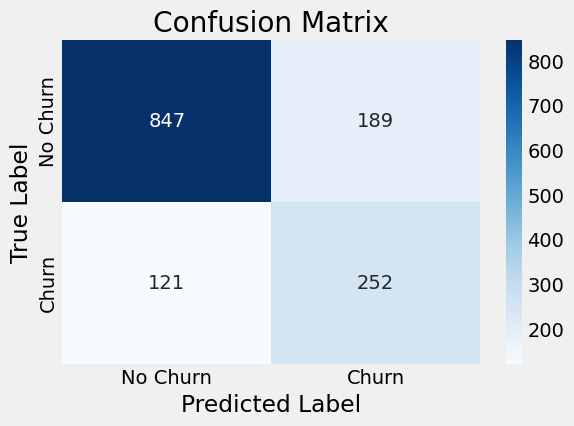

In [63]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Define class labels
class_names = ["No Churn", "Churn"]

# Plot the confusion matrix
plt.figure(figsize=(6, 4))  # Optional: Adjust figure size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show plot
plt.show()

In [64]:
# Define filenames and corresponding variables
file_paths = {
    "best_model.pkl": "loaded_model",
    "encoder.pkl": "encoders",
    "scaler.pkl": "scaler_data"
}

# Dictionary to store loaded objects
loaded_objects = {}

# Load the models and transformers safely
for file_name, var_name in file_paths.items():
    try:
        with open(file_name, "rb") as f:
            loaded_objects[var_name] = pickle.load(f)
    except FileNotFoundError:
        print(f"Warning: {file_name} not found. Skipping...")
    except Exception as e:
        print(f"Error loading {file_name}: {e}")

# Assign variables for easy access
loaded_model = loaded_objects.get("loaded_model")
encoders = loaded_objects.get("encoders")
scaler_data = loaded_objects.get("scaler_data")

In [65]:
# Define numerical and categorical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = list(encoders.keys())

def make_prediction(input_data):
    try:
        input_df = pd.DataFrame([input_data])

        # Handle missing columns
        for col in categorical_cols:
            if col in input_df:
                # Handle unseen categories safely
                input_df[col] = input_df[col].apply(lambda x: x if x in encoders[col].classes_ else np.nan)
                input_df[col] = input_df[col].fillna(encoders[col].classes_[0]) # Replace with a default class
                input_df[col] = encoders[col].transform(input_df[col])
            else:
                return f"Error: Missing column {col}"

        # Scale numerical features
        input_df[numerical_cols] = scaler_data.transform(input_df[numerical_cols])

        # Make prediction
        prediction = loaded_model.predict(input_df)[0]
        probability = loaded_model.predict_proba(input_df)[0, 1]

        return "Churn" if prediction == 1 else "No Churn", probability

    except Exception as e:
        return f"Error: {str(e)}"

In [70]:
# Example input dictionary representing a single customer's data
example_input = {
    "gender": "Female",                # Customer's gender
    "SeniorCitizen": 0,               # Indicates if the customer is a senior citizen (0 = No, 1 = Yes)
    "Partner": "Yes",                 # Whether the customer has a partner
    "Dependents": "Yes",               # Whether the customer has dependents
    "tenure": 6,                       # Number of months the customer has stayed with the company
    "PhoneService": "Yes",             # Whether the customer has phone service
    "MultipleLines": "Yes",            # Whether the customer has multiple phone lines
    "InternetService": "Fiber optic",  # Type of internet service (DSL, Fiber optic, None)
    "OnlineSecurity": "No",           # Whether the customer has online security service
    "OnlineBackup": "Yes",              # Whether the customer has online backup service
    "DeviceProtection": "Yes",         # Whether the customer has device protection
    "TechSupport": "No",              # Whether the customer has tech support
    "StreamingTV": "Yes",              # Whether the customer has a streaming TV service
    "StreamingMovies": "Yes",          # Whether the customer has a streaming movies service
    "Contract": "One year",            # Type of contract (Month-to-month, One year, Two year)
    "PaperlessBilling": "Yes",         # Whether the customer uses paperless billing
    "PaymentMethod": "Credit card (automatic)", # Payment method used by the customer
    "MonthlyCharges": 103.20,           # Monthly charges incurred by the customer
    "TotalCharges": 7362.9             # Total amount charged to the customer
}

In [71]:
#Function that preprocess the example_input dictionary to match the format expected by the trained model
def preprocess_input(example_input, encoders, scaler_data):
    # Convert the dictionary to a DataFrame
    input_df = pd.DataFrame([example_input])

    # Encode categorical features
    for col, encoder in encoders.items():
        if col in input_df.columns:
            input_df[col] = input_df[col].map(lambda x: encoder.get(x, np.nan))

    # Scale numerical features
    numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
    input_df[numeric_cols] = scaler_data.transform(input_df[numeric_cols])

    return input_df

In [72]:
# Make a prediction for the given example input
prediction, prob = make_prediction(example_input)

In [73]:
# Display the prediction result and probability score
print(f"Prediction: {prediction}\nProbability: {prob}")

Prediction: No Churn
Probability: 0.39666666666666667
